#### sklearn.tree.DecisionTreeClassifier
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 112)

dt_clf3 = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt_clf3.fit(X_train, y_train)
pred = dt_clf3.predict(X_test)

accuracy_score(y_test, pred)

0.9666666666666667

In [9]:
dt_clf3.classes_

array([0, 1, 2])

In [10]:
dt_clf3.feature_importances_

array([0.        , 0.        , 0.62769356, 0.37230644])

In [11]:
dt_clf = DecisionTreeClassifier(random_state = 42)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

In [12]:
dt_clf.feature_importances_

array([0.01252348, 0.        , 0.60026011, 0.3872164 ])

Feature importances: 
[0.013 0.    0.6   0.387]
sepal length (cm) : 0.013
sepal width (cm) : 0.000
petal length (cm) : 0.600
petal width (cm) : 0.387


<Axes: >

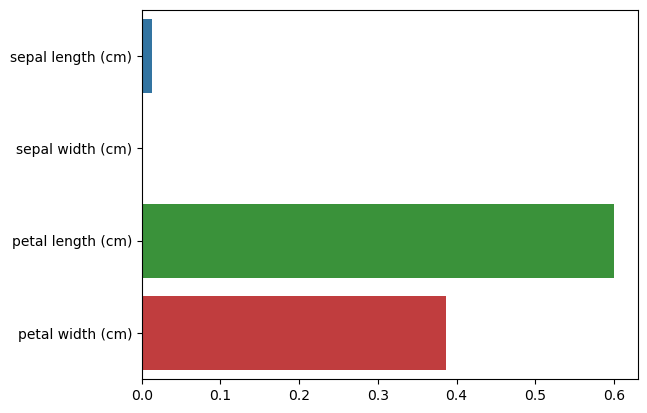

In [13]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('Feature importances: \n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature importance 매핑
for name, value, in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))

# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y = iris.feature_names)


In [14]:
from sklearn.tree import export_graphviz

dtdt_clf_3_graphviz = export_graphviz(dt_clf3, out_file = 'output_3.dot', feature_names = iris.feature_names, class_names = iris.target_names, impurity = True, filled = True)
dtdt_clf_graphviz = export_graphviz(dt_clf3, out_file = 'output.dot', feature_names = iris.feature_names, class_names = iris.target_names, impurity = True, filled = True)

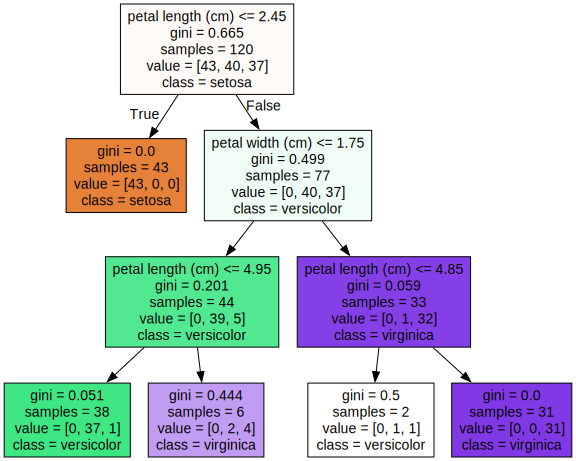

In [15]:
import graphviz
with open('output_3.dot')as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
# !pip install graphviz

     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00


#### sklearn.datasets.make_classification
sklearn.datasets.make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)

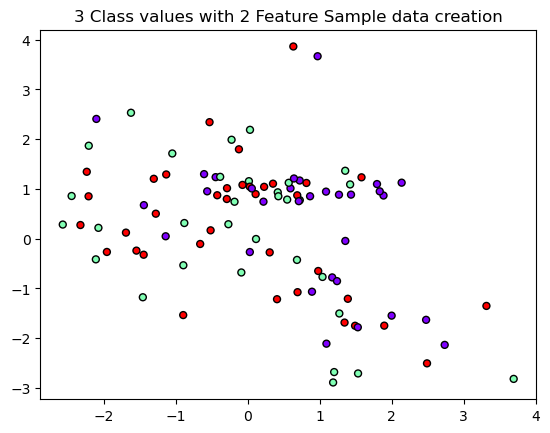

In [16]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Feature Sample data creation')

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classfication 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0, flip_y=0.9)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker = 'o', c = y_labels, s = 25, cmap = 'rainbow', edgecolors= 'k')


In [17]:
import numpy as np

# Classfier의 Decision Boundary를 시각화하는 함수
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()

    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c = y, s = 25, cmap='rainbow', edgecolor = 'k', clim = (y.min(), y.max()), zorder = 3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이터로 모델 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num = 200), np.linspace(ylim_start, ylim_end, num = 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf()를 이용하여 class boundary를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha = 0.3,
                           levels = np.arange(n_classes + 1) - 0.5,
                           cmap = 'rainbow', clim = (y.min(), y.max()),
                           zorder = 1)

C:\Users\Master\AppData\Local\Temp\ipykernel_5924\3351276444.py:22: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha = 0.3,


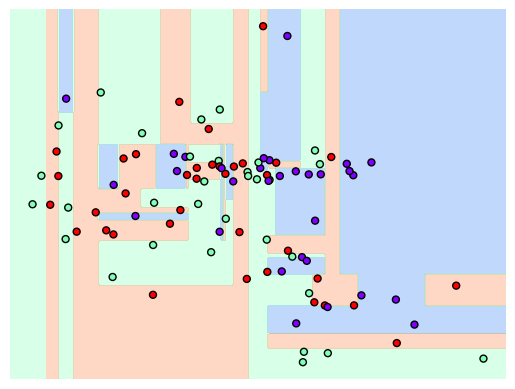

In [18]:
visualize_boundary(dt_clf, X_features, y_labels)

C:\Users\Master\AppData\Local\Temp\ipykernel_5924\3351276444.py:22: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha = 0.3,


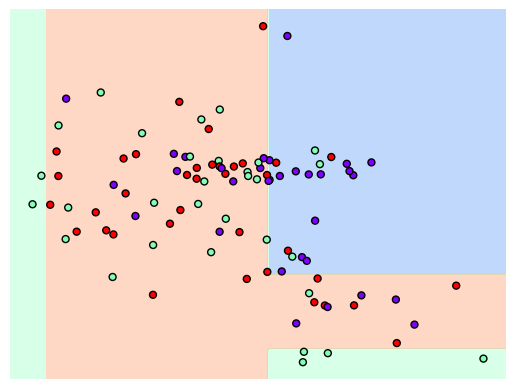

In [19]:
visualize_boundary(dt_clf3, X_features, y_labels)